In [ ]:
emb = "allenai/scibert_scivocab_uncased"
#emb = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
#emb = "dmis-lab/biobert-base-cased-v1.2"
#emb = "emilyalsentzer/Bio_ClinicalBERT"

In [ ]:
import pandas as pd
seq_df = pd.read_excel('lung_neoplasms_seqcls.xlsx')
pd.set_option('display.max_colwidth', None)
seq_df.head()

,pmid,disease,count,id,text,ann_group,annotation,words,mabib
0,29658856,lung_neoplasms,12,1,AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy,M,0,18.0,{None}
1,29658856,lung_neoplasms,12,2,"Among patients with a tumor proportion score for programmed death ligand 1 (PD-L1) of 50% or greater, pembrolizumab has replaced cytotoxic chemotherapy as the first-line treatment of choice",M,0,28.0,{'pembrolizumab'}
2,29658856,lung_neoplasms,12,3,The addition of pembrolizumab to chemotherapy resulted in significantly higher rates of response and longer progression-free survival than chemotherapy alone in a phase 2 trial,M,0,25.0,{'pembrolizumab'}
3,29658856,lung_neoplasms,12,4,"METHODS: In this double-blind, phase 3 trial, we randomly assigned (in a 2:1 ratio) 616 patients with metastatic nonsquamous NSCLC without sensitizing EGFR or ALK mutations who had received no previous treatment for metastatic disease to receive pemetrexed and a platinum-based drug plus either 200 mg of pembrolizumab or placebo every 3 weeks for 4 cycles, followed by pembrolizumab or placebo for up to a total of 35 cycles plus pemetrexed maintenance therapy",N,3,73.0,{'pembrolizumab'}
4,29658856,lung_neoplasms,12,5,Crossover to pembrolizumab monotherapy was permitted among the patients in the placebo-combination group who had verified disease progression,N,3,18.0,{'pembrolizumab'}


In [ ]:
seq_df['ann_group'].value_counts()

E    2008
N    1994
C     584
M     415
Name: ann_group, dtype: int64

In [ ]:
seq_seqlen = seq_df['text'].apply(lambda x: len(str(x).split()))
print(seq_seqlen)
print(max(seq_seqlen))

0       18
1       28
2       25
3       73
4       18
        ..
4997    35
4998    41
4999    24
5000    21
5001    11
Name: text, Length: 5002, dtype: int64
129


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


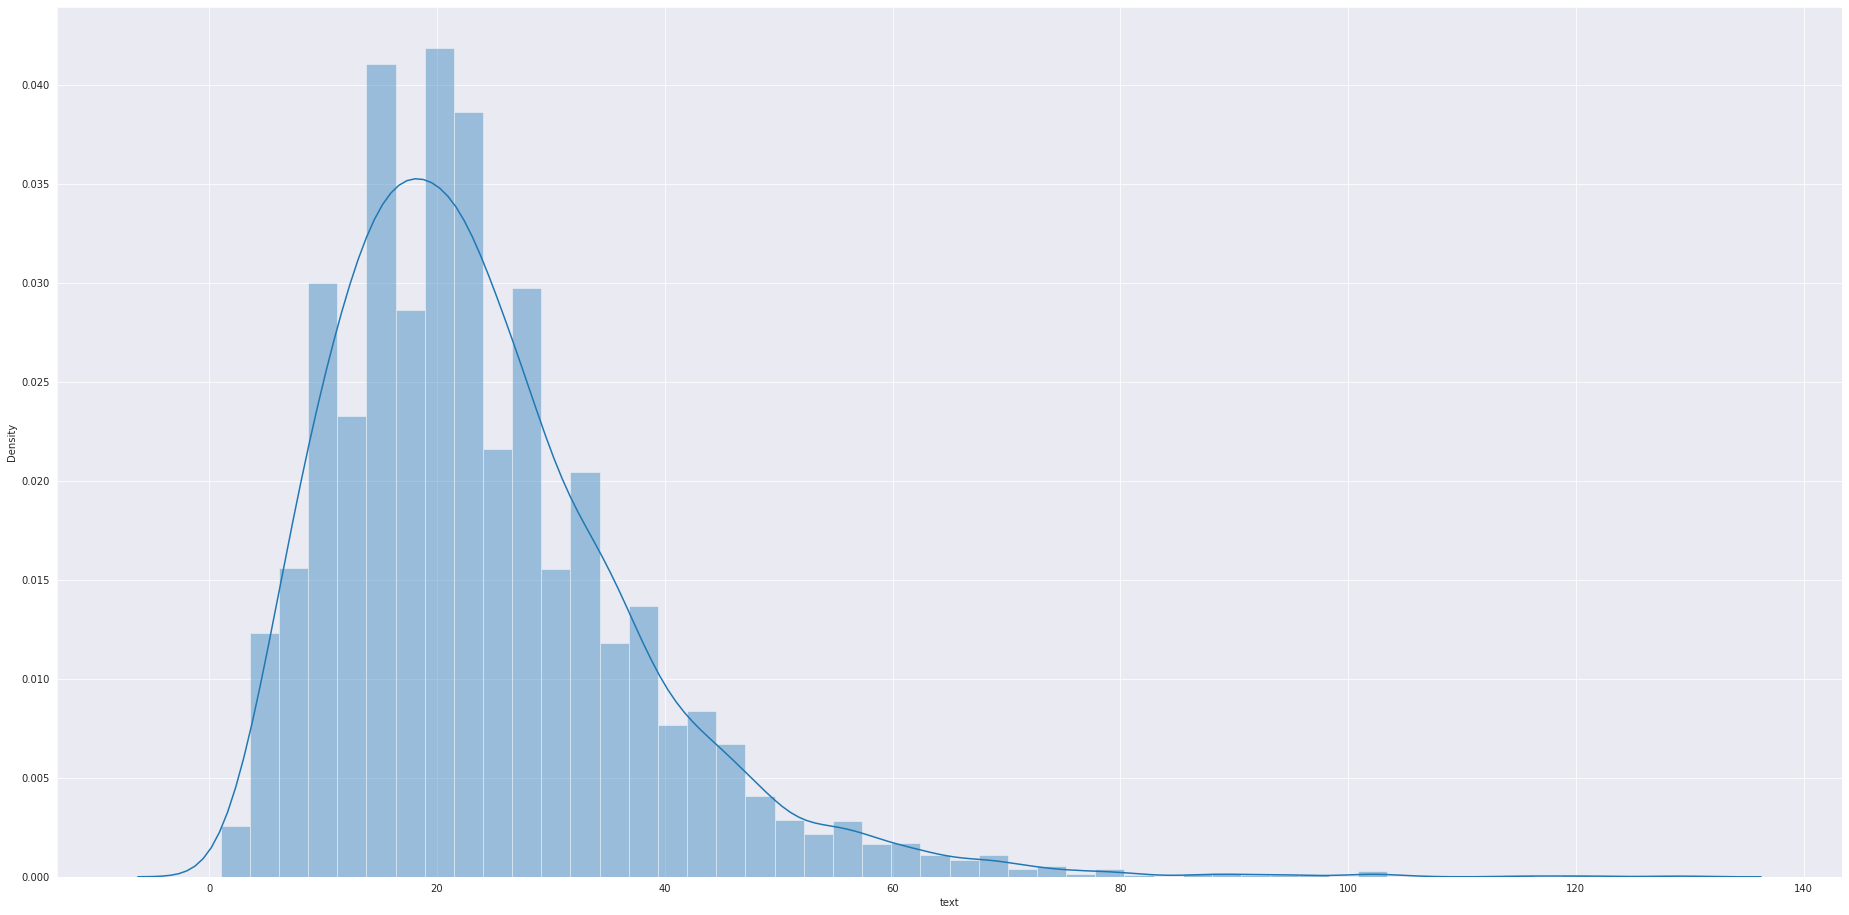

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(32,16))
sns.distplot(seq_seqlen)

In [ ]:
seq_df['text'] = seq_df['text'].astype(str).values.tolist()
print(len(seq_df['text']))

5002


In [ ]:
seq_features, seq_targets = seq_df['text'], seq_df['annotation']

In [ ]:
from sklearn.model_selection import train_test_split
seq_train_features, seq_test_features, seq_train_targets, seq_test_targets = train_test_split(
        seq_features, seq_targets,
        train_size=0.9,
        test_size=0.1,
        random_state=23,
        stratify=seq_targets
    )
print(seq_train_features,seq_train_targets)

48                                                                                                                                                                                                           CONCLUSIONS: Among patients with ALK-positive NSCLC who had not previously received an ALK inhibitor, progression-free survival was significantly longer among patients who received brigatinib than among those who received crizotinib
4303                                                                                                                                                                                                                                          The most common treatment-related adverse events were rash (89 [56%]), increased alanine aminotransferase concentrations (74 [46%]), and increased aspartate aminotransferase concentrations (65 [41%])
644                                                                                                                         

In [ ]:
print(len(seq_train_features), len(seq_train_targets))
print(len(seq_test_features), len(seq_test_targets))
s1 = seq_train_targets.value_counts()
print(s1)
s2 = seq_test_targets.value_counts()
print(s2)

4501 4501
501 501
2    1807
3    1794
1     526
0     374
Name: annotation, dtype: int64
2    201
3    200
1     58
0     42
Name: annotation, dtype: int64


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 6.6 MB/s 
     |████████████████████████████████| 120 kB 35.9 MB/s 
     |████████████████████████████████| 6.6 MB 45.9 MB/s 


In [ ]:
SEQ_LEN = 50

# **Vectorization Function "crt_vec"**

In [ ]:
import numpy as np
import tensorflow as tf
import transformers
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(emb)


def crt_vec(features):
  Xids = np.zeros((len(features),SEQ_LEN))
  for i, sequence in enumerate(features):
    tokens = tokenizer.encode_plus(sequence,max_length=SEQ_LEN,truncation=True, 
                                 padding="max_length",add_special_tokens=True,
                                 return_token_type_ids=False, 
                                 return_attention_mask=False,
                                 return_tensors='tf')
    Xids[i,:] = tokens['input_ids']
    Xids = Xids.astype(int)
  return Xids

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228k [00:00<?, ?B/s]

# **Oversampling using SMOTE**

In [ ]:
pd.set_option('display.max_colwidth', None)
seq_train_features_v = crt_vec(seq_train_features)
print(seq_train_features_v, seq_train_targets)

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 23)
seq_s_train_features, seq_s_train_targets = oversample.fit_resample(seq_train_features_v,seq_train_targets)



[[  102  3078   862 ...     0     0     0]
 [  102   111   755 ...     0     0     0]
 [  102  3078   862 ...   575 18229   103]
 ...
 [  102   351   579 ...     0     0     0]
 [  102   238   527 ...     0     0     0]
 [  102  5434   862 ...     0     0     0]] 48      1
4303    2
644     1
3974    3
1104    3
       ..
2869    1
4285    1
4514    3
1673    3
3068    3
Name: annotation, Length: 4501, dtype: int64


In [ ]:
print(len(seq_s_train_features))
print(len(seq_s_train_targets))

7228
7228


In [ ]:
print(seq_s_train_features)

[[  102  3078   862 ...     0     0     0]
 [  102   111   755 ...     0     0     0]
 [  102  3078   862 ...   575 18229   103]
 ...
 [  102  1076   951 ...  2732  1128    88]
 [  102 20145   323 ...     0     0     0]
 [  102  6465 16856 ...     0     0     0]]


In [ ]:
print(seq_s_train_targets)

0       1
1       2
2       1
3       3
4       3
       ..
7223    3
7224    3
7225    3
7226    3
7227    3
Name: annotation, Length: 7228, dtype: int64



# **Transformer Model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        attention_output = self.att(inputs, inputs) 
        
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim 

        })
        return config

In [ ]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions 
        
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config

In [ ]:
embed_dim = 256
num_heads = 2
feed_forward_dim = 256
maxlen = SEQ_LEN
vocab_size = 90000
def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)
    transformer_blockalph = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    transformer_blockbeta = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_blockalph(x)
    x = transformer_blockbeta(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(4)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model_seq =create_model()


In [ ]:
my_model_seq.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 token_position_embedding (T  (None, 50, 256)          23052800  
 okenPositionEmbedding)                                          
                                                                 
 transformer_block (Transfor  (None, 50, 256)          658688    
 merBlock)                                                       
                                                                 
 transformer_block_1 (Transf  (None, 50, 256)          658688    
 ormerBlock)                                                     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                             

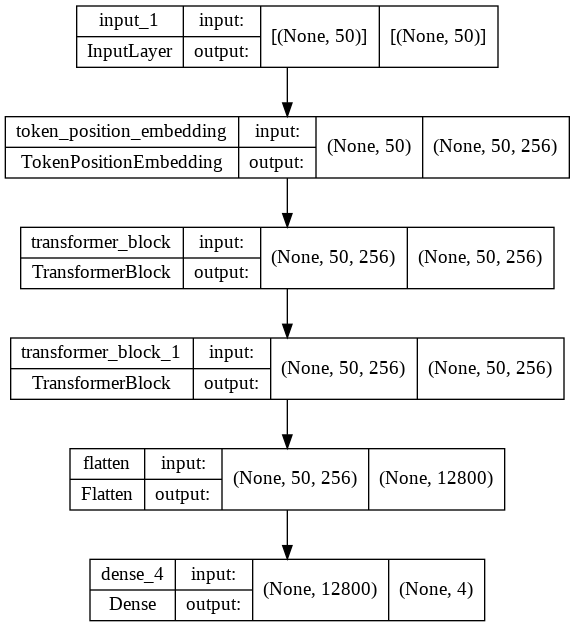

In [ ]:
tf.keras.utils.plot_model(my_model_seq,show_shapes=True)

# **Training the model**

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

train_features = seq_s_train_features
train_targets = seq_s_train_targets
X,y = train_features,train_targets

seq_f1_scores = []
seq_conf_matrix_list_of_arrays = []
seq_matthews_corrcoef_scores = []
n=3
seed=1
seq_k_fold = KFold(n_splits=n, random_state=seed, shuffle=True)

for train_index, test_index in seq_k_fold.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train_dtm = X_train
  X_test_dtm = X_test
  history = my_model_seq.fit(X_train_dtm, y_train, verbose=1, epochs=1)

151/151 [==============================] - 83s 553ms/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9589


# **Testing the model**

In [ ]:
SEQ_LEN = 50
#seq_test_features = stop_stem_lemma(seq_test_features)
test_features_v = crt_vec(seq_test_features)
y_pred_test = my_model_seq.predict(test_features_v)
y_pred_test = np.argmax(y_pred_test,axis=1)
 
seq_f1_score_test = f1_score(seq_test_targets, y_pred_test, average='weighted')
print('seq_f1_score_test :',seq_f1_score_test)

seq_f1_score_test : 0.8280848966070659


In [ ]:
seq_matthews_corrcoef = matthews_corrcoef(seq_test_targets, y_pred_test)
print('seq_matthews_corrcoef',seq_matthews_corrcoef)

seq_matthews_corrcoef 0.7405020376823632


In [ ]:
from sklearn.metrics import confusion_matrix
seq_conf_mat = confusion_matrix(seq_test_targets, y_pred_test,labels=[0, 1, 2,3])
ele,count = np.unique(np.array(seq_test_targets),return_counts=True)
print(dict(zip(ele, count)))
count = np.array(count)
seq_conf_mat = seq_conf_mat/count
seq_conf_mat.astype(str)
seq_conf_mat
#type(seq_conf_mat)

{0: 42, 1: 58, 2: 201, 3: 200}


array([[0.85714286, 0.01724138, 0.        , 0.025     ],
       [0.07142857, 0.68965517, 0.02487562, 0.05      ],
       [0.02380952, 0.05172414, 0.81094527, 0.17      ],
       [0.16666667, 0.01724138, 0.07960199, 0.88      ]])

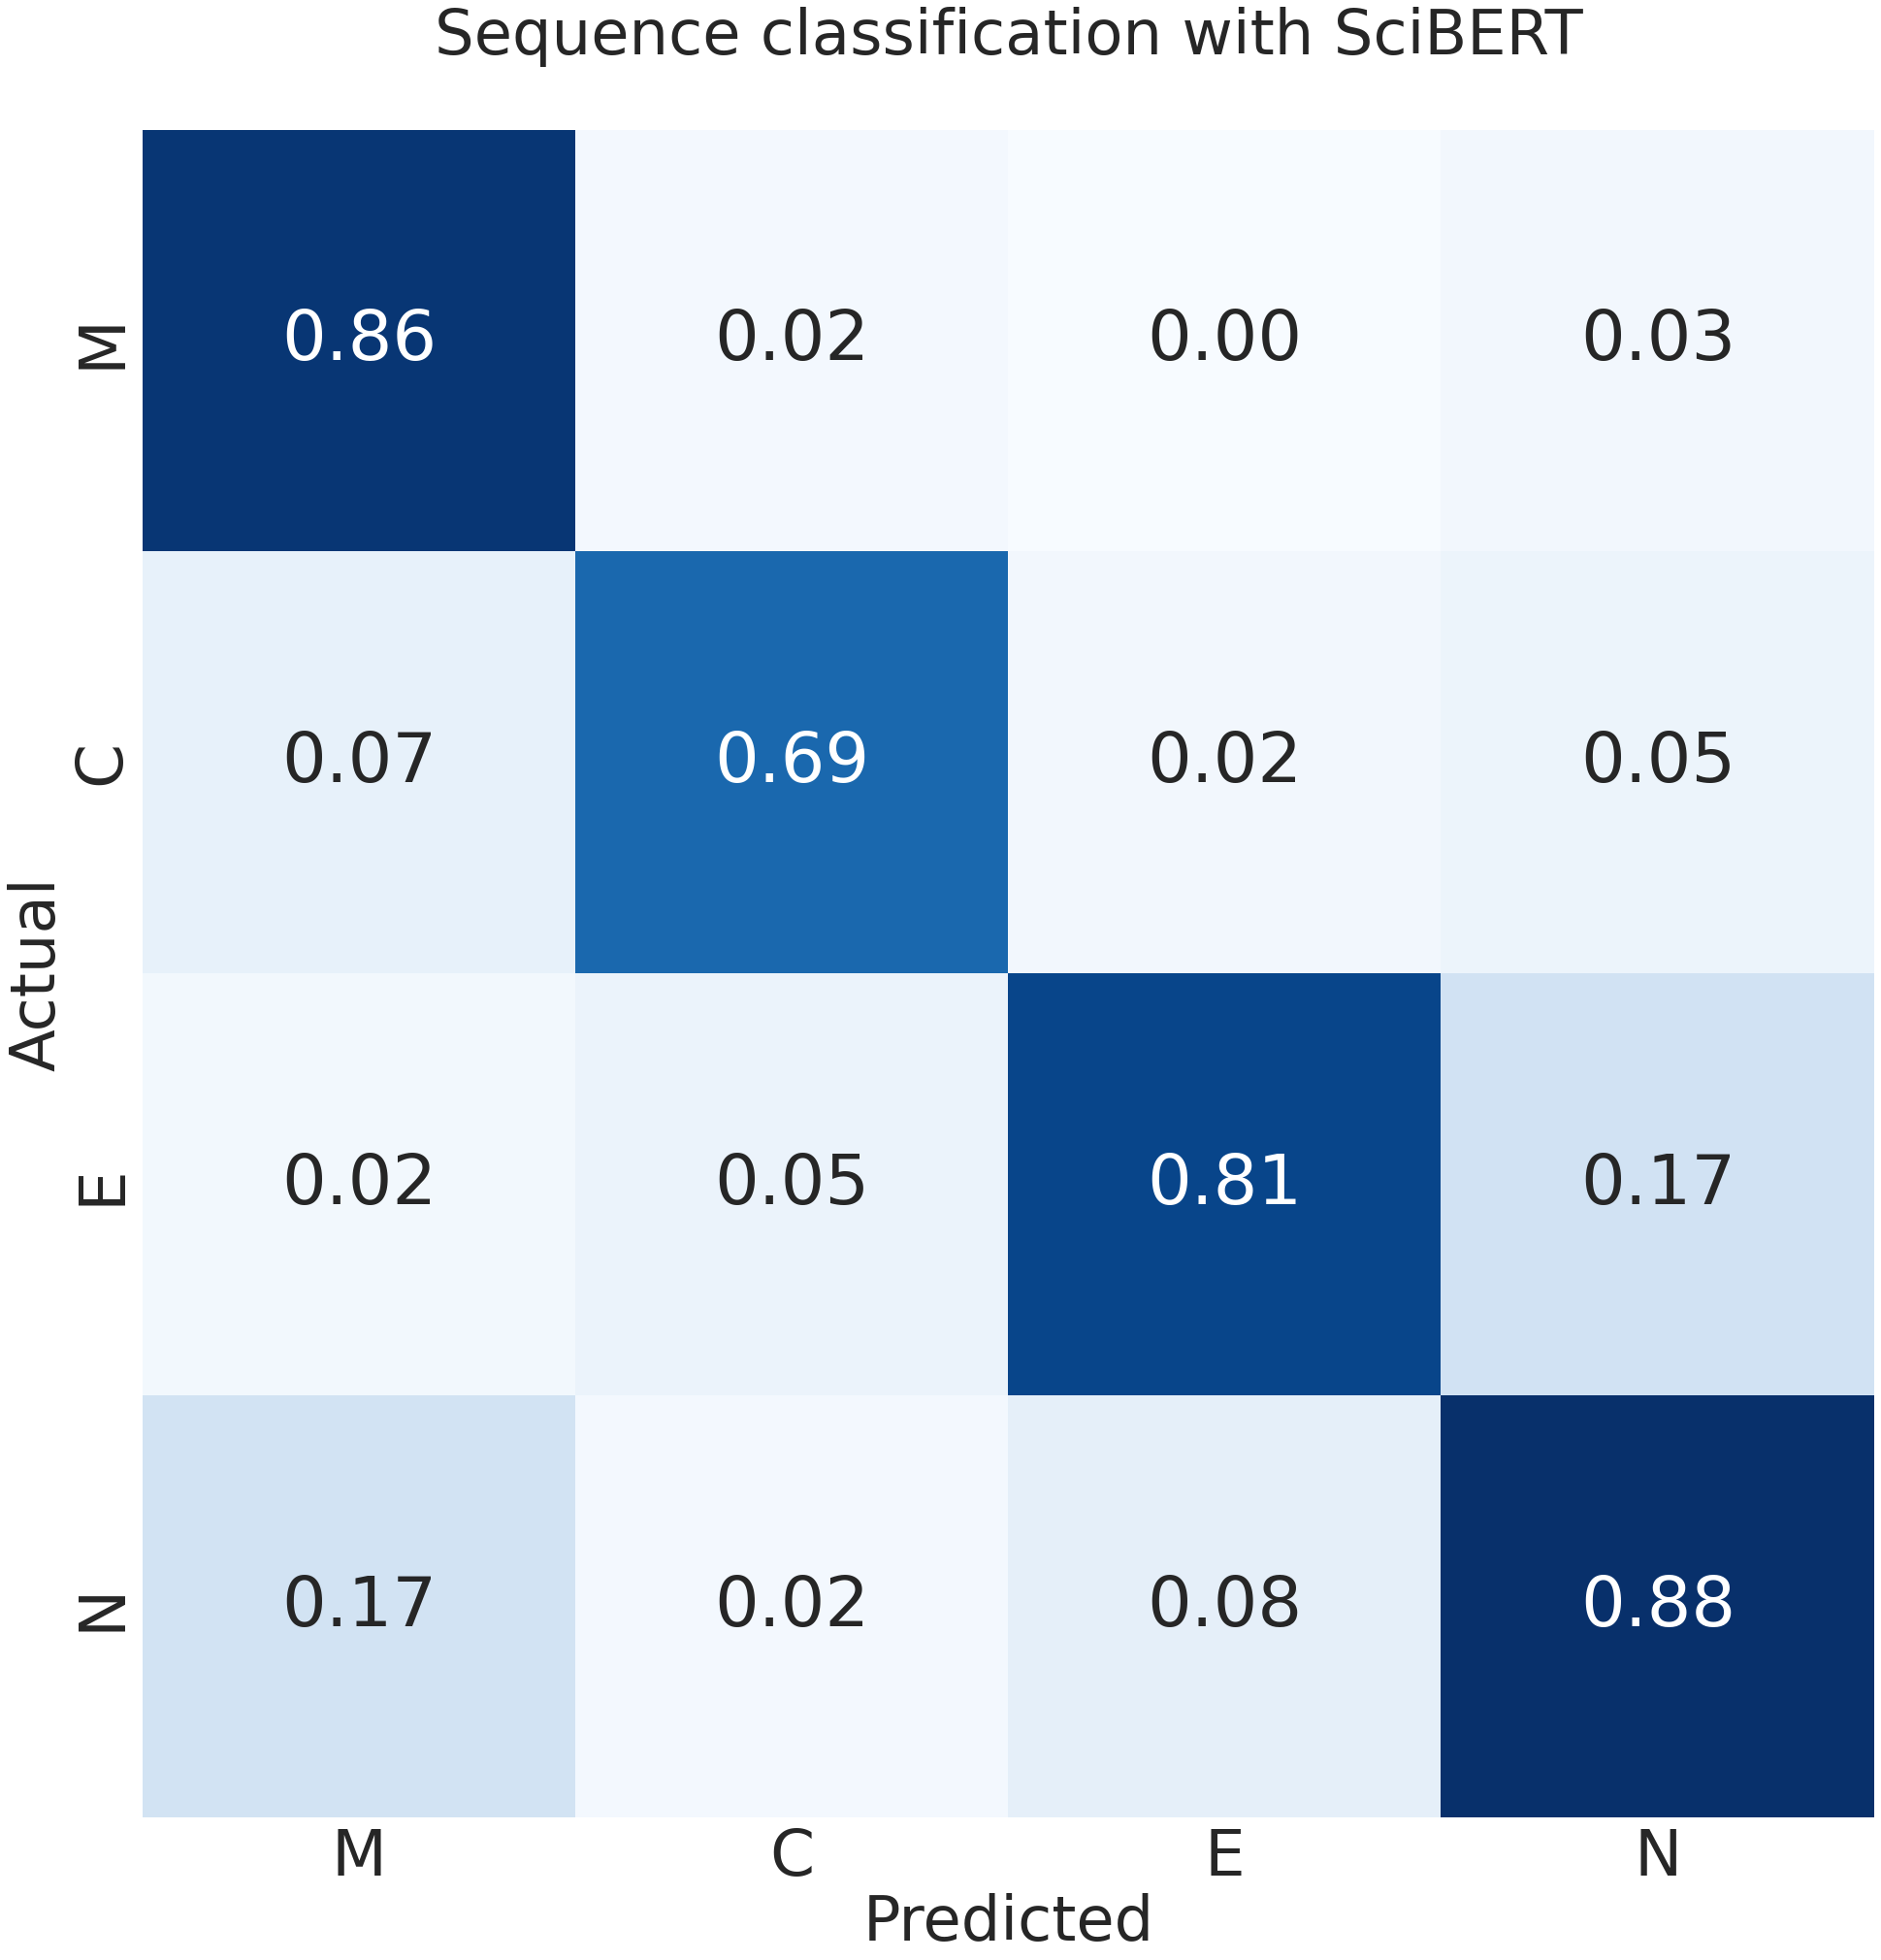

In [ ]:
#Confusion Matrix
import seaborn as sns
#seq_conf_mat = confusion_matrix(seq_test_targets, y_pred_test, labels = [0,1,2,3])

sns.set(font_scale=6)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(32,32))
sns.heatmap(seq_conf_mat, annot=True, cmap="Blues", fmt='.2f',cbar = False, xticklabels=['M','C','E','N'], yticklabels=['M','C','E','N'])
plt.ylabel('Actual',size=64)
plt.xlabel('Predicted',size=64)
plt.title("Sequence classification with SciBERT\n", size=64);

In [ ]:
seq_id_to_category = {0:"Major Claim", 1:"Claim", 2:"Evidence",3:"Non-Argumentative"}

In [ ]:
#claim f1
sc_TP = 0
sc_FP = 0
sc_TN = 0
sc_FN = 0
for n,m in zip(seq_test_targets, y_pred_test):
  if n==1 and m==1:
    sc_TP += 1
  elif n!=1 and m!=1:
    sc_TN += 1
  elif n!=1 and m==1:
    sc_FP += 1
  elif n==1 and m!=1:
    sc_FN += 1
seq_claim_f1 = sc_TP/(sc_TP+0.5*(sc_FP+sc_FN))
print('seq_claim_f1',seq_claim_f1)

seq_claim_f1 0.7766990291262136


In [ ]:
#claim matthews
seq_claim_matthews = ((sc_TP*sc_TN) - (sc_FP*sc_FN))/ (((sc_TP+sc_FP)*(sc_TP+sc_FN)*(sc_TN+sc_FP)*(sc_TN+sc_FN))**(1/2))
print('seq_claim_matthews',seq_claim_matthews)

seq_claim_matthews 0.7590892637719087


In [ ]:
#evidence f1
se_TP = 0
se_FP = 0
se_TN = 0
se_FN = 0
for n,m in zip(seq_test_targets, y_pred_test):
  if n==2 and m==2:
    se_TP += 1
  elif n!=2 and m!=2:
    se_TN += 1
  elif n!=2 and m==2:
    se_FP += 1
  elif n==2 and m!=2:
    se_FN += 1
seq_evidence_f1 = se_TP/(se_TP+0.5*(se_FP+se_FN))
print('seq_evidence_f1',seq_evidence_f1)

seq_evidence_f1 0.8467532467532467


In [ ]:
#evidence_matthews
seq_evidence_matthews = ((se_TP*se_TN) - (se_FP*se_FN))/ (((se_TP+sc_FP)*(se_TP+se_FN)*(se_TN+se_FP)*(se_TN+se_FN))**(1/2))
print('seq_evidence_matthews',seq_evidence_matthews)

seq_evidence_matthews 0.7884252349273492


In [ ]:
tf.keras.models.save_model(my_model_seq, 'scibert_seq')
scibert_seq = tf.keras.models.load_model('scibert_seq')


# **Relation Classification with scibert embedding**

In [ ]:
import pandas as pd

In [ ]:
SEQ_LEN = 80

In [ ]:
rel_df = pd.read_excel('lung_neoplasms_relcls.xlsx')
rel_df.head()

,text,ann,annotation
0,AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy-SEP-The addition of pembrolizumab to chemotherapy resulted in significantly higher rates of response and longer progression-free survival than chemotherapy alone in a phase 2 trial,A,1
1,"AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy-SEP-METHODS: In this double-blind, phase 3 trial, we randomly assigned (in a 2:1 ratio) 616 patients with metastatic nonsquamous NSCLC without sensitizing EGFR or ALK mutations who had received no previous treatment for metastatic disease to receive pemetrexed and a platinum-based drug plus either 200 mg of pembrolizumab or placebo every 3 weeks for 4 cycles, followed by pembrolizumab or placebo for up to a total of 35 cycles plus pemetrexed maintenance therapy",A,1
2,AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy-SEP-Crossover to pembrolizumab monotherapy was permitted among the patients in the placebo-combination group who had verified disease progression,N,0
3,"AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy-SEP-The primary end points were overall survival and progression-free survival, as assessed by blinded, independent central radiologic review",N,0
4,"AB - BACKGROUND: First-line therapy for advanced non-small-cell lung cancer (NSCLC) that lacks targetable mutations is platinum-based chemotherapy-SEP-RESULTS: After a median follow-up of 10.5 months, the estimated rate of overall survival at 12 months was 69.2% (95% confidence interval [CI], 64.1 to 73.8) in the pembrolizumab-combination group versus 49.4% (95% CI, 42.1 to 56.2) in the placebo-combination group (hazard ratio for death, 0.49; 95% CI, 0.38 to 0.64; P<0.001)",N,0


In [ ]:
rel_df['ann'].value_counts()

N    30221
S     1887
A      582
Name: ann, dtype: int64

In [ ]:
rel_seqlen = rel_df['text'].apply(lambda x: len(str(x).split()))
print(rel_seqlen)
print(max(rel_seqlen))

0        42
1        90
2        35
3        35
4        69
         ..
32685    61
32686    51
32687    44
32688    34
32689    31
Name: text, Length: 32690, dtype: int64
190


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


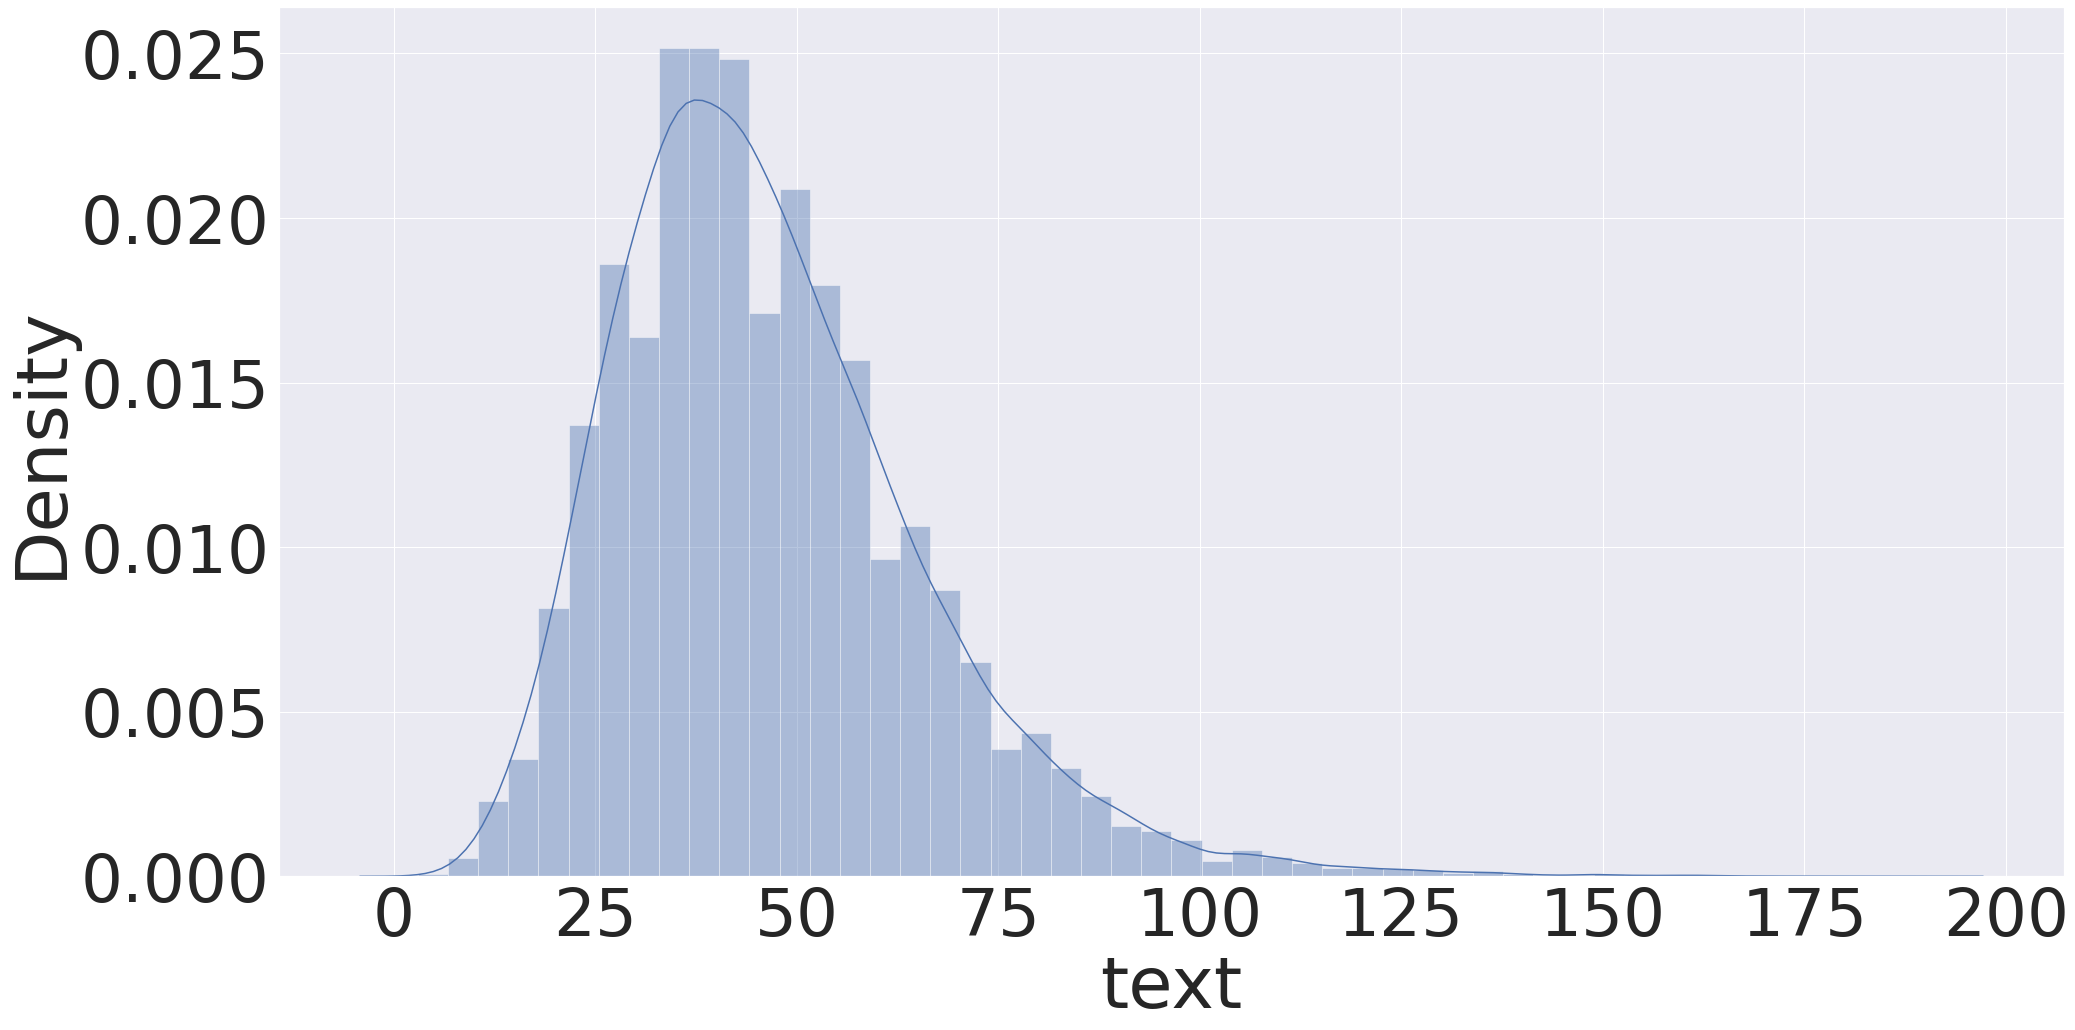

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(32,16))
sns.distplot(rel_seqlen)

In [ ]:
rel_df['text'] = rel_df['text'].astype(str).values.tolist()
print(len(rel_df['text']))

32690


In [ ]:
rel_features, rel_targets = rel_df['text'], rel_df['annotation']

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
rel_train_features, rel_test_features, rel_train_targets, rel_test_targets = train_test_split(
        rel_features, rel_targets,
        train_size=0.9,
        test_size=0.1,
        random_state=23,
        stratify=rel_targets
    )
print(rel_train_features,rel_train_targets)

7433                                    AB - OBJECTIVES: This open-label, randomized phase II trial evaluated antitumor efficacy of an antiestrogen, fulvestrant, in combination with human epidermal growth factor receptor (EGFR) inhibitor, erlotinib, in advanced non-small cell lung cancer (NSCLC) patients-SEP-Notably, EGFR WT patients were more likely to be hormone receptor-positive (either estrogen receptor α- and/or progesterone receptor-positive) compared to EGFR mutant patients (50% versus 9.1%, respectively) (p = 0.03)
21645    Patients were randomly assigned (1:1) to receive either adjuvant erlotinib (150 mg once daily administered orally) or vinorelbine and cisplatin chemotherapy (four cycles of vinorelbine [25 mg/m(2) intravenously on days 1 and 8 of each 21-day cycle] plus cisplatin [75 mg/m(2) intravenously on day 1 of each 21-day cycle])-SEP--INTERPRETATION: Adjuvant erlotinib improved 2-year disease-free survival in patients with EGFR mutation-positive stage IIIA NSCLC compa

In [ ]:
print(len(rel_train_features), len(rel_train_targets))
print(len(rel_test_features), len(rel_test_targets))
s1 = rel_train_targets.value_counts()
print(s1)
s2 = rel_test_targets.value_counts()
print(s2)

29421 29421
3269 3269
0    27204
2     1695
1      522
Name: annotation, dtype: int64
0    3023
2     188
1      58
Name: annotation, dtype: int64


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Vectorization Function "crt_vec"**

In [ ]:
import numpy as np
import tensorflow as tf
import transformers
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(emb)


def crt_vec(features):
  Xids = np.zeros((len(features),SEQ_LEN))
  for i, sequence in enumerate(features):
    tokens = tokenizer.encode_plus(sequence,max_length=SEQ_LEN,truncation=True, 
                                 padding="max_length",add_special_tokens=True,
                                 return_token_type_ids=False, 
                                 return_attention_mask=False,
                                 return_tensors='tf')
    Xids[i,:] = tokens['input_ids']
    Xids = Xids.astype(int)
  return Xids

# **Oversampling using SMOTE**

In [ ]:
rel_train_features_v = crt_vec(rel_train_features)
print(rel_train_features_v, rel_train_targets)
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 23)
rel_s_train_features, rel_s_train_targets = oversample.fit_resample(rel_train_features_v,rel_train_targets)

[[  102   351   579 ...  1474   579   103]
 [  102   568   267 ...   535  2337   103]
 [  102  2518   137 ...     0     0     0]
 ...
 [  102  1045   862 ...   205   450   103]
 [  102   579 12634 ...     0     0     0]
 [  102   579  4248 ...     0     0     0]] 7433     0
21645    0
6410     0
15143    0
16509    0
        ..
13842    0
19774    0
9651     0
26458    0
24324    0
Name: annotation, Length: 29421, dtype: int64


In [ ]:
print(len(rel_s_train_features))
print(len(rel_s_train_targets))

81612
81612


In [ ]:
print(rel_s_train_targets)

0        0
1        0
2        0
3        0
4        0
        ..
81607    2
81608    2
81609    2
81610    2
81611    2
Name: annotation, Length: 81612, dtype: int64


In [ ]:
print(rel_s_train_features)

[[ 102  351  579 ... 1474  579  103]
 [ 102  568  267 ...  535 2337  103]
 [ 102 2518  137 ...    0    0    0]
 ...
 [ 102 3110 3490 ...  353 4530  103]
 [ 102  579  142 ... 1838 1693   57]
 [ 102  111 1878 ...    0    0    0]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        #causal_mask = causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        #attention_output = self.att(inputs, inputs,inputs, inputs,inputs, inputs,inputs, inputs,attention_mask=causal_mask) 
        attention_output = self.att(inputs, inputs) 
        
        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim 

        })
        return config

In [ ]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions 
        
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config

In [ ]:
embed_dim = 256
num_heads = 2
feed_forward_dim = 256
maxlen = SEQ_LEN
vocab_size = 90000
def create_model():
    inputs_tokens = layers.Input(shape=(maxlen,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(maxlen, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)
    transformer_blockZ = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    transformer_blockX = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_blockZ(x)
    x = transformer_blockX(x)

    x = layers.Flatten()(x)
    outputs = layers.Dense(4)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)  
    
    return model
my_model_rel =create_model()


In [ ]:
my_model_rel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80)]              0         
                                                                 
 token_position_embedding_1   (None, 80, 256)          23060480  
 (TokenPositionEmbedding)                                        
                                                                 
 transformer_block_2 (Transf  (None, 80, 256)          658688    
 ormerBlock)                                                     
                                                                 
 transformer_block_3 (Transf  (None, 80, 256)          658688    
 ormerBlock)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 20480)             0         
                                                           

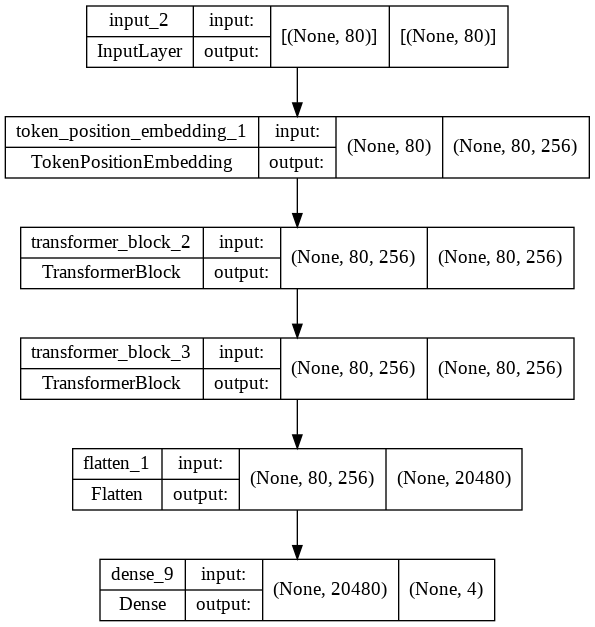

In [ ]:
tf.keras.utils.plot_model(my_model_rel,show_shapes=True)

# **Training the model**

In [ ]:
SEQ_LEN = 80
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
maxlen = SEQ_LEN
my_model_rel =create_model()
train_features = rel_s_train_features
train_targets = rel_s_train_targets
X,y = train_features,train_targets

rel_balanced_accuracy_scores = []
rel_f1_scores = []
rel_conf_matrix_list_of_arrays = []
rel_matthews_corrcoef_scores = []

n=3
seed=1
rel_k_fold = KFold(n_splits=n, random_state=seed, shuffle=True)

for train_index, test_index in rel_k_fold.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train_dtm = X_train
  X_test_dtm = X_test
  history = my_model_rel.fit(X_train_dtm, y_train, verbose=1, epochs=1)

1701/1701 [==============================] - 1295s 762ms/step - loss: 0.4063 - sparse_categorical_accuracy: 0.8212


# **Testing the model**

In [ ]:
SEQ_LEN = 80
#rel_test_features = stop_stem_lemma(rel_test_features)
test_features_v = crt_vec(rel_test_features)
y_pred_test = my_model_rel.predict(test_features_v)
y_pred_test = np.argmax(y_pred_test,axis=1)
 
rel_f1_score_test = f1_score(rel_test_targets, y_pred_test, average='weighted')
print('f1_score_test :',rel_f1_score_test)

f1_score_test : 0.899952425289218


In [ ]:
rel_matthews_corrcoef = matthews_corrcoef(rel_test_targets, y_pred_test)
print('rel_matthews_corrcoef',rel_matthews_corrcoef)

rel_matthews_corrcoef 0.23000163202790297


In [ ]:
tab = pd.DataFrame({'f':rel_test_features, 't': rel_test_targets})
tab['t'].value_counts()

0    3023
2     188
1      58
Name: t, dtype: int64

{0: 3023, 1: 58, 2: 188}


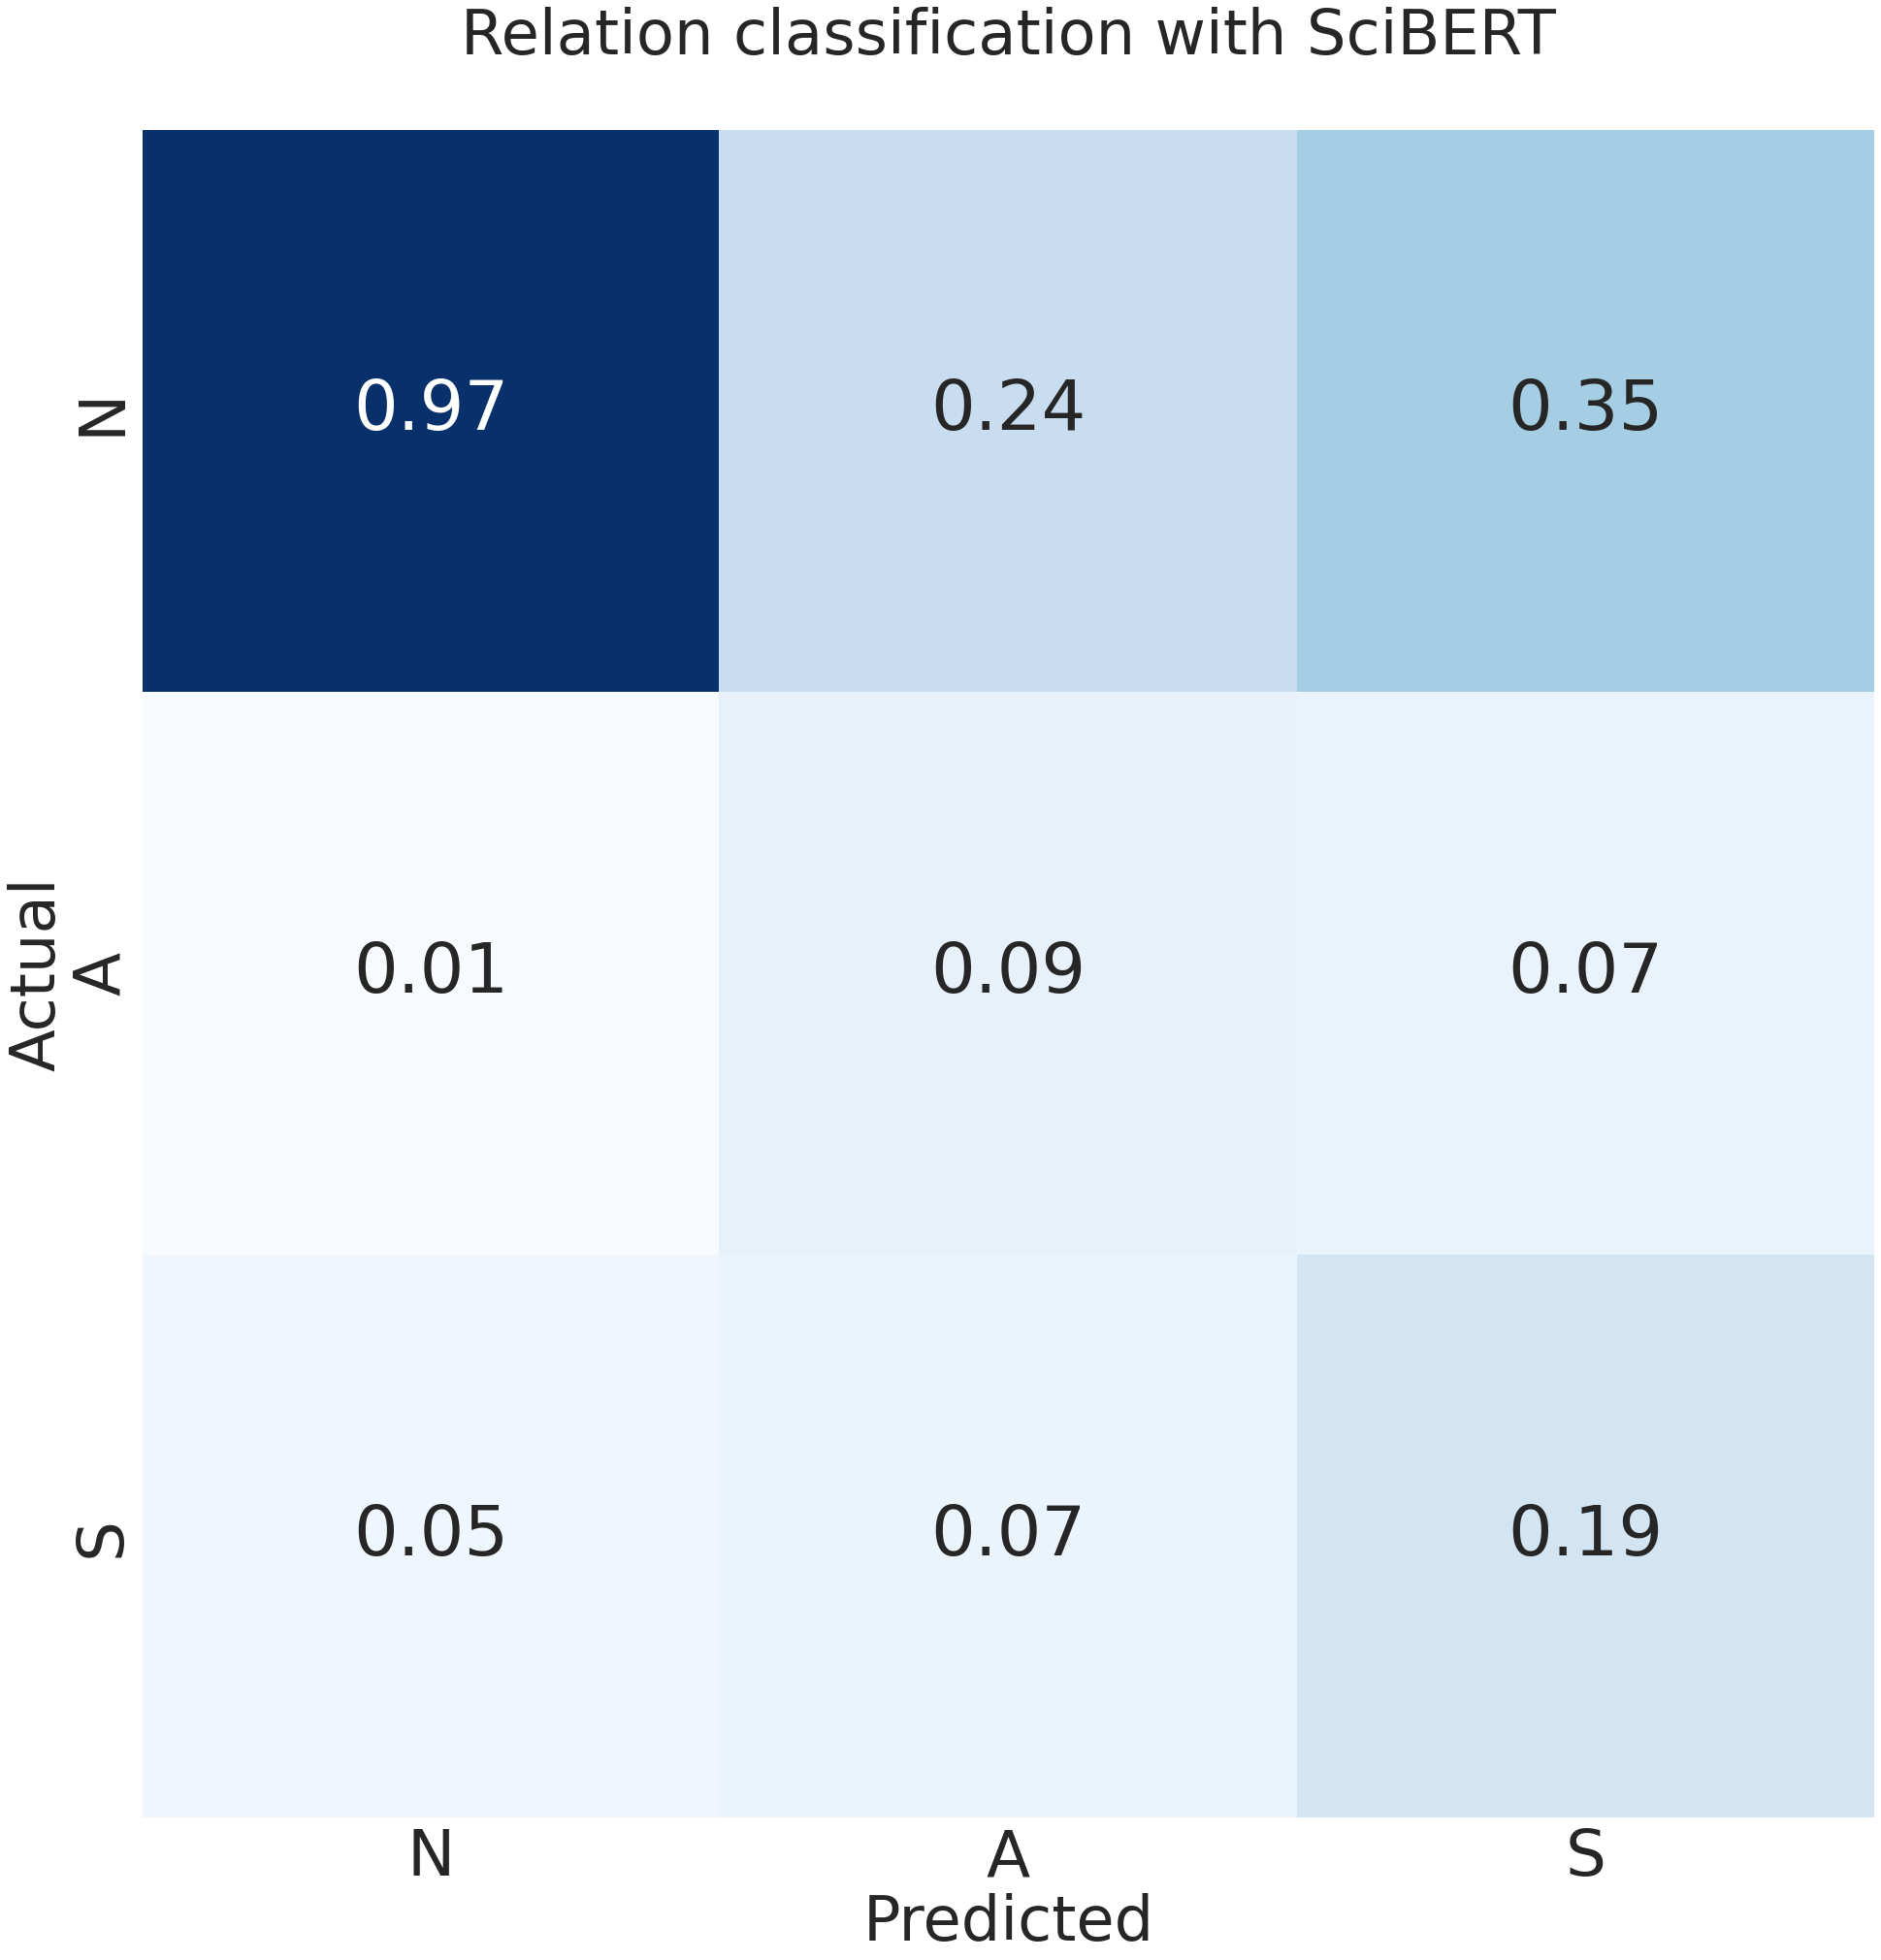

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
rel_conf_mat = confusion_matrix(rel_test_targets, y_pred_test, labels = [0,1,2])
ele,count = np.unique(np.array(rel_test_targets),return_counts=True)
print(dict(zip(ele, count)))
count = np.array(count)
rel_conf_mat = rel_conf_mat/count
rel_conf_mat.astype(str)
rel_conf_mat
sns.set(font_scale=6)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(32,32))
sns.heatmap(rel_conf_mat, annot=True, cmap="Blues", fmt='.2f',cbar = False,
            xticklabels=['N','A','S'], 
            yticklabels=['N','A','S'])
plt.ylabel('Actual',size=64)
plt.xlabel('Predicted',size=64)
plt.title("Relation classification with SciBERT\n", size=64);




In [ ]:
#attack f1
rc_TP = 0
rc_FP = 0
rc_TN = 0
rc_FN = 0
for n,m in zip(rel_test_targets, y_pred_test):
  if n==1 and m==1:
    rc_TP += 1
  elif n!=1 and m!=1:
    rc_TN += 1
  elif n!=1 and m==1:
    rc_FP += 1
  elif n==1 and m!=1:
    rc_FN += 1
rel_attack_f1 = rc_TP/(rc_TP+0.5*(rc_FP+rc_FN))
print('rel_attack_f1',rel_attack_f1)

rel_attack_f1 0.12345679012345678


In [ ]:
#attack matthews
rel_attack_matthews = ((rc_TP*rc_TN) - (rc_FP*rc_FN))/ (((rc_TP+rc_FP)*(rc_TP+rc_FN)*(rc_TN+rc_FP)*(rc_TN+rc_FN))**(1/2))
print('rel_attack_matthews',rel_attack_matthews)

rel_attack_matthews 0.12730260760924558


In [ ]:
#support f1
re_TP = 0
re_FP = 0
re_TN = 0
re_FN = 0
for n,m in zip(rel_test_targets, y_pred_test):
  #print(n,m)
  if n==2 and m==2:
    re_TP += 1
  elif n!=2 and m!=2:
    re_TN += 1
  elif n!=2 and m==2:
    re_FP += 1
  elif n==2 and m!=2:
    re_FN += 1
rel_support_f1 = re_TP/(re_TP+0.5*(re_FP+re_FN))
print('rel_support_f1',rel_support_f1)

rel_support_f1 0.23102310231023102


In [ ]:
#support_matthews
rel_support_matthews = ((re_TP*re_TN) - (re_FP*re_FN))/ (((re_TP+rc_FP)*(re_TP+re_FN)*(re_TN+re_FP)*(re_TN+re_FN))**(1/2))
print('rel_support_matthews',rel_support_matthews)

rel_support_matthews 0.29821605653803485


In [ ]:
tf.keras.models.save_model(my_model_rel, 'scibert_rel')
scibert_rel = tf.keras.models.load_model('scibert_rel')

# **Argument Mining from a PUBMED abstract**

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
def strings_in_a_list(txt):
  text = open(txt,'r')
  nobreak = '\n'.join(text.readlines())
  iron = nobreak.replace('\n',' ')
  iron = iron.replace("AB  -",". AB  -")
  iron = iron.replace("FAU  -",". FAU  -")                        
  iron = iron.replace("CI  -",". CI  -")
  sent = sent_tokenize(iron)
  without_gap = [n.strip() for n in sent]
  without_period = [na.strip(".") for na in without_gap]
  str_lis = [' '.join(nam.split()) for nam in without_period]
  return str_lis


def filtered(txt):
  lis = []
  switchh = False
  for string in txt:
    if switchh == False:
      if string[:5] == "PMID-":
        pmid = string[6:14]
      elif string[:4] == "AB -":
        switchh = True
        lis.append("pmid:"+pmid+"~ "+string)
      else:
        continue
    elif switchh == True:
      if string[:5] == "PMID-":
        pmid = string[6:14]
      elif string[:5] == "FAU -" or string[:4] == "CI -":
        switchh = False
        continue
      else:
        lis.append("pmid:"+pmid+"~ "+string)
  for nam in lis:
    if nam[-2:] == "~ ":
      lis.remove(nam)
  return lis

def f(txt):
  corpora = strings_in_a_list(txt)
  filt = filtered(corpora)
  return filt

def all_files():
  files = ['straight_from_pubmed.txt']
  lis = []
  for txt in files:
    lis.append([txt +" "+sent for sent in f(txt)])
    lis = sum(lis,[])
    return lis

def dataframe():
  corpora = all_files()
  main_list = corpora
  text = [' '.join(sent.split()[2:]) for sent in main_list]
  pmid = [sent.split()[1][5:-1] for sent in main_list]
  data =  {'pmid':pmid,
          'text':text}
  tabularasa = pd.DataFrame(data)
  return tabularasa
tabularasa = dataframe()
df_abs = tabularasa

tempest = pd.DataFrame()
m = len(tabularasa['text'])

for n in range(m):
  target = df_abs['text'].values[n]
  df_abs['target'] = target
  temp = df_abs[n+1:]
  tempest = tempest.append(temp)
  df_abs = df_abs[0:]
tempest['text_ix'] = [tabularasa[tabularasa['text']==nam].index.values[0] for nam in tempest['text']]
tempest['target_ix'] = [tabularasa[tabularasa['text']==nam].index.values[0] for nam in tempest['target']]
lis1 = tempest.text_ix.values
lis2 = tempest.target_ix.values
text = tempest.pop('text')
target = tempest.pop('target')
tempest.insert(0,'text',target+"-SEP-"+text)
seq_cls_df = tabularasa['text']
rel_cls_df = tempest['text']


examples = seq_cls_df
SEQ_LEN = 50
predictions=scibert_seq.predict(crt_vec(examples))
seq_pred = []
for pred in predictions:
  #print(seq_id_to_category[np.argmax(pred)])
  seq_pred.append(np.argmax(pred))


examples = rel_cls_df
SEQ_LEN = 80
rel_count = 0
rel_pred = []
predictions=scibert_rel.predict(crt_vec(examples))
for pred in predictions:
  #print(rel_id_to_category[np.argmax(pred)])
  rel_pred.append(np.argmax(pred))
  if np.argmax(pred) != 0:
    rel_count += 1



tabularasa['seq_pred'] = seq_pred
tabularasa['colors'] = tabularasa['seq_pred'].apply(lambda x: 1 if x == 0 else (2 if x == 1 else (3 if x == 2 else 4)))
tempest['rel_pred'] = rel_pred
lis3 = tempest.rel_pred.values
tempest['tupling'] = list(zip(lis1,lis2,lis3))
#(1,3,1),(2,5,2),(4,5,2),(6,7,0)...
nodes = [nam for nam in range(len(tabularasa))]
node_cls = list(tabularasa['seq_pred'])
edges = [nam for nam in tempest['tupling'] if nam[2] != 0]
#(1,3,1),(2,5,2),(4,5,2),...



import plotly.graph_objects as go
import networkx as nx

G = nx.random_geometric_graph(len(nodes),0.15)

#print(G.nodes())
category_id = {0:'No Relation',1:'Attack',2:'Support'}
weights = [nam[2] for nam in edges]
tabularasa['colors'] = tabularasa['seq_pred'].apply(lambda x: 1 if x == 0 else (2 if x == 1 else (3 if x == 2 else 4)))
import numpy as np
edge_x = []
edge_y = []
x_text = []
y_text = []
for edge in edges:
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        x_text.append((x0+x1)/2)
        y_text.append((y0+y1)/2)
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
edge_trace = go.Scatter(
    x=edge_x, y=edge_y, 
    line=dict(width=.5, color='#888'),
    hoverinfo='none',
    mode='lines')

weight_trace = go.Scatter(x = x_text,
                          y = y_text,
                          mode = 'text',
                          text= [category_id[nam] for nam in weights],
                          textposition = 'top center')


node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
print(node_x,node_y)
seq_lis = ["Major Claim","Claim","Evidence","Non-Argumentative"]
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        color= tabularasa['colors'],
        colorscale = [[0, 'rgb(255,255,217)'],
                      [0.125,'rgb(255,255,217)'], 
                      [0.25, 'rgb(199,233,180)'],
                      [0.375,'rgb(199,233,180)'],
                      [0.5,'rgb(65,200,196)'],
                      [0.625,'rgb(65,200,196)'],
                      [0.875, 'rgb(12, 44, 132)'],
                      [1.0,'rgb(12,44,132)']],
        size=25,
        colorbar=dict(
             ticktext = seq_lis,
             tickvals = list(range(1,len(seq_lis)+1))
        ),
        line_width=1))
seq_cls_df = tabularasa['text']
node_adjacencies = []
node_text = []
from textwrap import wrap
for node, adjacencies in enumerate(G.adjacency()):
    nline = [nam+"<br>" for nam in wrap(seq_cls_df[node],50)]
    node_text.append(nline)

node_trace.marker.color = list(tabularasa['colors'])
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace, weight_trace],
             layout=go.Layout(
                title='<br>Argument Mining for the given abstract',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.update_layout(autosize=False,width=1500,height=800)
fig.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[0.42284436485267973, 0.006427202722056213, 0.09356399414491223, 0.32634968725248936, 0.49257792346845963, 0.5279620630247286, 0.3443105673818251, 0.7825658227463033, 0.7088489584804406, 0.7628632878335206, 0.15560604179303728, 0.8250367885402091, 0.864779363849104, 0.706625795816137] [0.3784229712062288, 0.5874015698511723, 0.21688018418717392, 0.8723304838303647, 0.44738458521802527, 0.7987382096800112, 0.07692296114043307, 0.046289233470953706, 0.14926749662783634, 0.10693226816486512, 0.93484688148312, 0.9110897873492564, 0.13123567371484535, 0.8285474058161123]
